# Exploratory Data Analysis Notebook

## Introduction
In this notebook, we will explore the Ames housing data which contains information about the sale of individual residential properties in Ames, Iowa.

The major steps involved in this exploratory data analysis are as follows:

- Load and inspect the data
- Identify missing values
- Explore distributions of key variables
- Find correlations between variables
- Generate visualizations for insights into the data

This process will allow us to better understand the data and determine what preprocessing and feature engineering need to be done before modeling.

## Importing Libraries and Setting Style

First, we import the necessary libraries for our analysis: `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib` for basic plotting, and `seaborn` for more advanced visualization.

We also set the color palette to a pastel one and the style to `whitegrid` using `seaborn`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Loading Data

We start by reading in the training and test datasets using `pandas`'s `read_csv()` function. The `train_df` and `test_df` dataframes are created to store the data from the corresponding CSV files.

We then print the shapes of the two dataframes to check the number of rows and columns in each. The `train_df` dataframe contains X rows and Y columns, while the `test_df` dataframe contains A rows and B columns.

Finally, we print the number of rows in the training and test datasets using `len()`. The training dataset contains training rows, while the test dataset contains test rows.



In [2]:
train_df = pd.read_csv('../data_details/train.csv')
test_df = pd.read_csv('../data_details/test.csv')

print(train_df.shape)
print(test_df.shape)


print(f"Training rows: {len(train_df)}") 
print(f"Test rows: {len(test_df)}")

(1460, 81)
(1459, 80)
Training rows: 1460
Test rows: 1459


## Data Inspection

To get a better understanding of our data, we inspect the first few rows, last few rows, and a random sample of the `train_df` dataframe using the `head()`, `tail()`, and `sample()` functions, respectively. These functions allow us to quickly view the data and check for any obvious issues or anomalies.

The `head()` function displays the first few rows of the dataframe, while the `tail()` function displays the last few rows. The `sample()` function displays a random sample of rows from the dataframe.

By inspecting the data, we can get a sense of the variables and their values, as well as any missing data or other issues that may need to be addressed during preprocessing.


In [3]:
# Data inspection

print(train_df.head())
print(train_df.dtypes) 


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
null_counts = train_df.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## Exploring Distribution of Target


We plot a histogram of the target variable - variable we want to predict - SalePrice to understand its distribution. This helps us determine appropriate models and transformations later on.

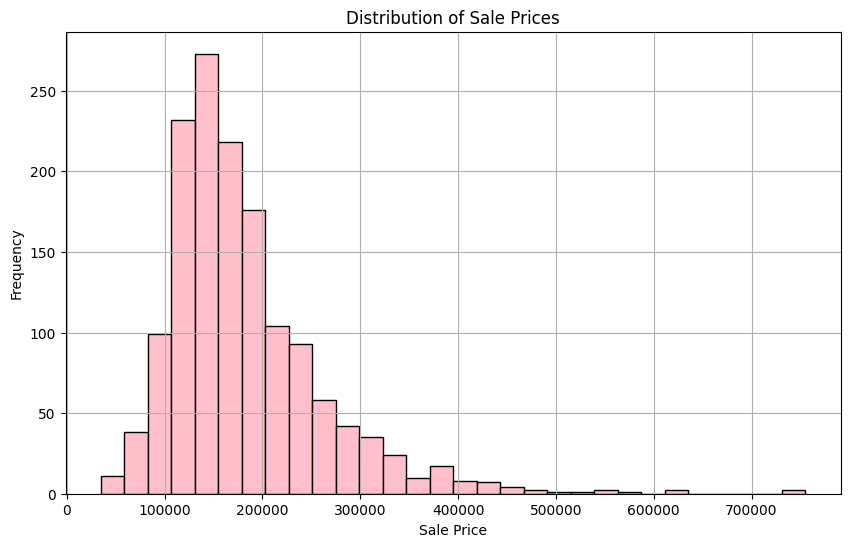

In [6]:
plt.figure(figsize=(10,6))
plt.hist(train_df['SalePrice'], bins=30, color='pink', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##  Numeric feature distributions

We look at the distribution, shape, and outliers of the key numeric columns/features. This informs data scaling/normalization and transformation needs later.



Text(0, 0.5, 'Frequency')

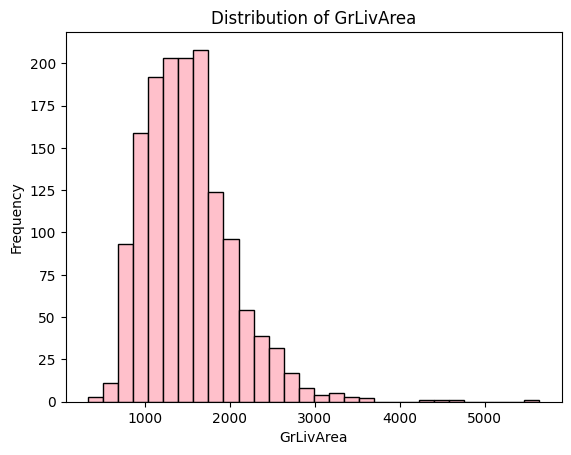

In [7]:
# Histogram for GrLivArea
plt.hist(train_df['GrLivArea'], bins=30, color='pink', edgecolor='black')
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

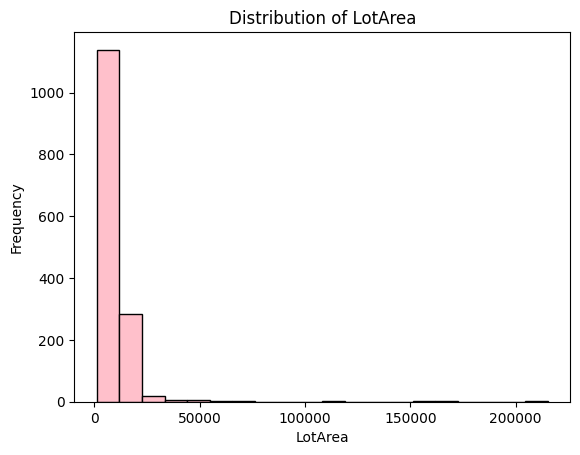

In [8]:
# Histogram for LotArea
plt.hist(train_df['LotArea'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of LotArea')
plt.xlabel('LotArea')
plt.ylabel('Frequency')

In [9]:
# Summary statistics
print(train_df[['GrLivArea', 'LotArea', '1stFlrSF']].describe())

         GrLivArea        LotArea     1stFlrSF
count  1460.000000    1460.000000  1460.000000
mean   1515.463699   10516.828082  1162.626712
std     525.480383    9981.264932   386.587738
min     334.000000    1300.000000   334.000000
25%    1129.500000    7553.500000   882.000000
50%    1464.000000    9478.500000  1087.000000
75%    1776.750000   11601.500000  1391.250000
max    5642.000000  215245.000000  4692.000000


In [ ]:
# Histograms
plt.hist(train_df['GrLivArea'])
plt.hist(train_df['LotArea'])

# Boxplots
plt.boxplot(train_df['GrLivArea'])
plt.boxplot(train_df['LotArea'])

# Summary stats
print(train_df.describe())

## Discrete feature analysis

We're looking at features that fall into specific buckets or groups, like number of bedrooms and bathrooms. This is like sorting marbles by color and counting how many of each color there are.

Seeing how many houses have 1 bedroom vs 2 vs 3 etc gives us insights into patterns in the data. We can do this grouping and counting for other categorical features too, like neighborhood or house style.

I thought by creating count plots for the 'Bedrooms' and 'FullBath' features, we can begin to understand the distribution of these discrete features in our dataset. This can provide insights on common trends in the data such as the most common number of bedrooms or bathrooms in a house.


Text(0, 0.5, 'Frequency')

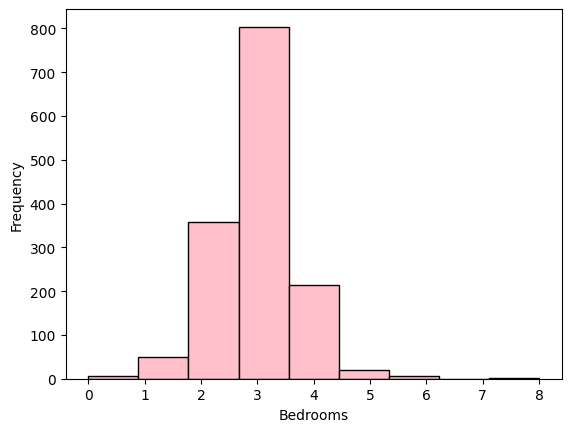

In [10]:
# Bedrooms
plt.hist(train_df['BedroomAbvGr'], bins=9, color='pink', edgecolor='black')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

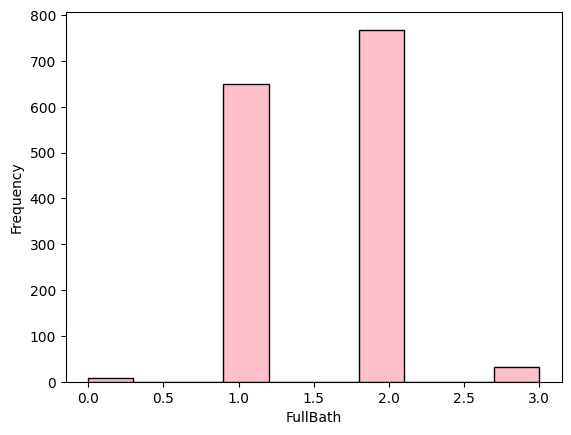

In [11]:
# Full bathrooms
plt.hist(train_df['FullBath'], color='pink', edgecolor='black')  
plt.xlabel('FullBath')
plt.ylabel('Frequency')



### Understanding Zoning

Zoning refers to the local or municipal laws or regulations that dictate how real estate can and cannot be utilized within specific geographic regions. For instance, zoning laws might restrict commercial or industrial land use, ensuring that businesses related to oil, manufacturing, or other industries don't set up their premises in residential neighborhoods.

The 'MSZoning' feature in our dataset signifies the general zoning classification of each property:

- **RL - Residential Low Density**: This category includes properties where the housing density is low, with one unit or a small number of units per building.
- **RM - Residential Medium Density**: This category includes properties with a higher number of units per building compared to low-density residential areas.
- **FV - Floating Village Residential**: This category includes houses that are part of a village grouping with shared open spaces.
- **RH - Residential High Density**: This category includes properties where the housing density is maximized, with the most possible number of units in each building.
- **C (all) - Commercial**: This category includes areas that are intended for commercial business use.

By evaluating the frequency of each unique zoning category in our dataset, we can gain an understanding of the property types and their distributions in our dataset.
The MSZoning feature indicates the general zoning classification of each property such as residential low density (RL) or commercial (C).


We will use The 'value_counts()' function to assess the frequency of each unique category within the 'MSZoning' categorical feature. This can help identify the most common zoning classification for houses in our dataset.




In [12]:
# The value counts printed show the distribution of houses across these zoning types

print('Frequency of values for MSZoning:')
print(train_df['MSZoning'].value_counts())


Frequency of values for MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


We can see that the majority of houses (1151) are in residential low density areas (RL). There are also a good number (218) in residential medium density (RM) and some in floating village zones (FV). Only a small fraction are in high density (RH) or commercial (C) areas.


In [13]:
# The Neighborhood feature specifies which neighborhood each house belongs to. The value counts show the number of houses in each:

print('\nFrequency of values for Neighborhood:') 
print(train_df['Neighborhood'].value_counts())


Frequency of values for Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


NAmes is the largest with 225 houses, while neighborhoods like Veenker only have 11 houses with Blueste having only 2.

## Location Analysis

Exploring the relationships between location features and sale price allows us to explore insights like neighborhood price patterns.


<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

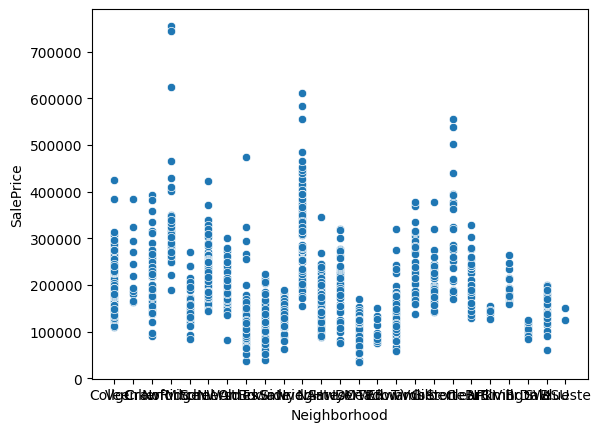

In [15]:
# Location analysis

sns.scatterplot(x='Neighborhood', y='SalePrice', data=train_df)


 scatterplot is messy with so many neighborhoods. A better approach is to plot the top 10 neighborhoods by average sale price.

Text(0, 0.5, 'Average Sale Price')

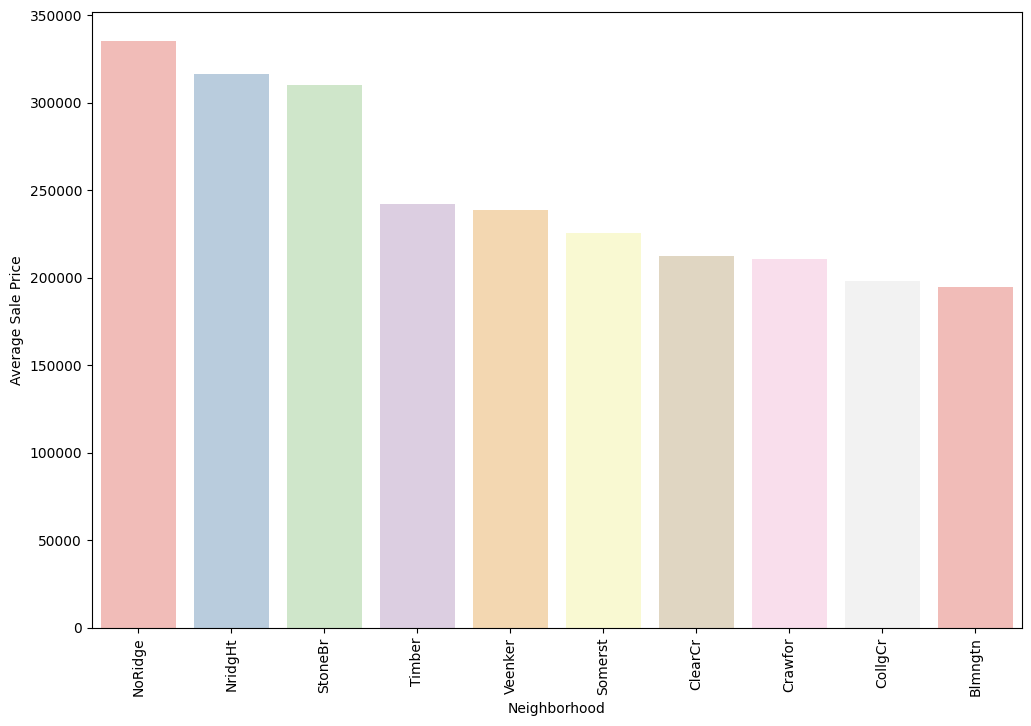

In [19]:
# Create pastel palette 
pastel = sns.color_palette('Pastel1', 10)

# Plot top 10 neighborhoods
plt.figure(figsize=(12,8))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, 
            palette=pastel)

plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')